In [32]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, LSTM, Embedding, Bidirectional
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import regularizers

In [49]:
with open('fixed_sequences_length_9_PELM/Group_Phos_Y_neg.fasta', 'r') as f:
    s_negatif_txt = f.readlines()

s_negatif = np.array([])
for i in range(1,len(s_negatif_txt),2):
    temp = s_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    s_negatif = np.append(s_negatif, temp2)

sequenceL = int(len(s_negatif)/9)
s_negatif_new = np.expand_dims(s_negatif, axis=0)
s_negatif_new = s_negatif_new.reshape(sequenceL,9)
labelneg = np.zeros((sequenceL,), dtype=int)
s_negatif_label = np.expand_dims(labelneg, axis=0)
s_negatif_label = s_negatif_label.reshape(sequenceL,1)
print(s_negatif_new.shape)
print(s_negatif_label.shape)


(226, 9)
(226, 1)


In [50]:
with open('fixed_sequences_length_9_PELM/Group_Phos_Y_pos.fasta', 'r') as f:
    s_positif_txt = f.readlines()

s_positif = np.array([])
for i in range(1,len(s_positif_txt),2):
    temp = s_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    s_positif = np.append(s_positif, temp2)

sequenceL = int(len(s_positif)/9)
s_positif_new = np.expand_dims(s_positif, axis=0)
s_positif_new = s_positif_new.reshape(sequenceL,9)
labelpos = np.ones((sequenceL,), dtype=int)
s_positif_label = np.expand_dims(labelpos, axis=0)
s_positif_label = s_positif_label.reshape(sequenceL,1)
print(s_positif_new.shape)
print(s_positif_label.shape)


(267, 9)
(267, 1)


In [52]:
training_X = np.concatenate((s_positif_new, s_negatif_new), axis=0, out=None)
training_Y = np.concatenate((s_positif_label, s_negatif_label), axis=0, out=None)

training_Y_onehot = to_categorical(training_Y)

asam = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(asam)
sequence_of_int = []
for i in range(len(training_X)):
    temp = tokenizer.texts_to_sequences(training_X[i])
    sequence_of_int = np.append(sequence_of_int, temp)

sequence_of_int = sequence_of_int-1
sequence_of_int_onehot = to_categorical(sequence_of_int)
sequence_of_int_onehot = np.expand_dims(sequence_of_int_onehot, axis=3)
sequence_of_int_onehot = sequence_of_int_onehot.reshape(len(training_X),9,20,1)
sequence_of_int = sequence_of_int.reshape(len(training_X),9)

print(sequence_of_int_onehot.shape)
train_X, valid_X, train_label, valid_label = train_test_split(sequence_of_int, training_Y_onehot, test_size=0.2, random_state=13)
print(train_X.shape)
print(valid_X[0])

(493, 9, 20, 1)
(394, 9)
[ 5.  1.  3. 10. 18. 15.  7. 10.  2.]


/home/bharuno/envtensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()


In [53]:
epochs = 100

model = Sequential()
model.add(Embedding(20, 8, input_length=9))
#model.add(Conv2D(1, kernel_size = (1,20), activation='relu', input_shape=(9,20,1)))
#model.add(Flatten(data_format=None))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='sigmoid'))
model.add(Bidirectional(LSTM(128, kernel_regularizer=regularizers.l2(0.1), recurrent_regularizer=regularizers.l2(0.1), 
                             bias_regularizer=regularizers.l2(0.1)), merge_mode='concat', weights=None))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 9, 8)              160       
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 256)               140288    
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 514       
Total params: 140,962
Trainable params: 140,962
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_train = model.fit(train_X, train_label, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_label))

Train on 394 samples, validate on 99 samples
Epoch 1/100
394/394 [==============================] - 3s 9ms/step - loss: 49.7444 - acc: 0.5203 - val_loss: 43.6561 - val_acc: 0.5253
Epoch 2/100
394/394 [==============================] - 0s 341us/step - loss: 40.0382 - acc: 0.5457 - val_loss: 36.0092 - val_acc: 0.5253
Epoch 3/100
394/394 [==============================] - 0s 333us/step - loss: 33.6621 - acc: 0.5457 - val_loss: 31.0546 - val_acc: 0.5253
Epoch 4/100
394/394 [==============================] - 0s 360us/step - loss: 29.5242 - acc: 0.5457 - val_loss: 27.8083 - val_acc: 0.5253
Epoch 5/100
394/394 [==============================] - 0s 341us/step - loss: 26.7765 - acc: 0.5457 - val_loss: 25.6035 - val_acc: 0.5253
Epoch 6/100
394/394 [==============================] - 0s 326us/step - loss: 24.8757 - acc: 0.5457 - val_loss: 24.0335 - val_acc: 0.5253
Epoch 7/100
394/394 [==============================] - 0s 327us/step - loss: 23.4912 - acc: 0.5457 - val_loss: 22.8537 - val_acc: 0.525

394/394 [==============================] - 0s 308us/step - loss: 4.1803 - acc: 0.7690 - val_loss: 4.1080 - val_acc: 0.7475
Epoch 61/100
394/394 [==============================] - 0s 309us/step - loss: 4.0386 - acc: 0.7716 - val_loss: 3.9637 - val_acc: 0.7475
Epoch 62/100
394/394 [==============================] - 0s 306us/step - loss: 3.8929 - acc: 0.7589 - val_loss: 3.8263 - val_acc: 0.7273
Epoch 63/100
394/394 [==============================] - 0s 310us/step - loss: 3.7574 - acc: 0.7741 - val_loss: 3.6814 - val_acc: 0.7475
Epoch 64/100
394/394 [==============================] - 0s 351us/step - loss: 3.6204 - acc: 0.7614 - val_loss: 3.5681 - val_acc: 0.7374
Epoch 65/100
394/394 [==============================] - 0s 350us/step - loss: 3.4891 - acc: 0.7716 - val_loss: 3.4234 - val_acc: 0.7475
Epoch 66/100
394/394 [==============================] - 0s 336us/step - loss: 3.3694 - acc: 0.7614 - val_loss: 3.3146 - val_acc: 0.7475
Epoch 67/100
394/394 [==============================] - 0s 30

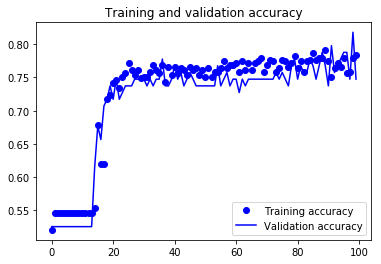

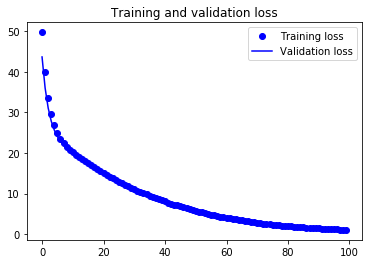

In [55]:
# Plot the training accuracy
accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()